In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np         
import scikitplot as skplt

# Crisp-DM Methodology (Data Understanding)
* Compare data to the given data description 
* If there are discrepancies in the data, what are they? 
* Use visual support to see attributes and their corrolation to the given problem      
 ### 1.a

In [2]:
rawData=pd.read_csv('../600092_data.csv')   
rawDataC= rawData.copy()         
rawData

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


Calling 'dtypes' method from pandas library to confirm that all data types match expected results according to the data description. 
* 'Contra' column has an 'Object' type assign to it despite it being labelled as a numerical value in the dataset
* Will be changed to 'int' during the cleaning process


In [3]:
rawData.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra           object
label            object
dtype: object

In [4]:
rawData.shape

(1520, 11)

### Data description states that: 
"Random - Real number of help in randomly sorting the data records: Should be unique
values."
* See below that these are not unique and contain many duplicates
### 1.b

In [5]:
duplicates= rawData.Random.duplicated().sum() #Checks for duplicates and adds them up (298 duplicates in 'Random' column)  
print("Total number of duplicates for 'Random' column: " + str(duplicates))    

Total number of duplicates for 'Random' column: 298


These two bar charts show the type of cardiovascular event that triggered the hospitalisation on the X-axis to see whether patients are at a higher risk of developing cancer based on their cardiovascular event as indicated by the hue of labels, 'Risk, 'NoRisk' and 'Unknown'     

**What does this mean?** 
* Patients hospitalised by 'TIA' are the most unlikely to get cancer based on the ratio of over 300 for 'NoRisk' compared to 60 for 'Risk'
* On the other hand, those hospitalised by 'A-F' have the closest 'Risk' to 'NoRisk' ratio meaning it's the most common hospitalisation event for triggering cancer, followed by 'ASX' and 'CVA'
* 'ASx' and 'Asx' have the same meaning therefore making them the same entities, these should be combined and results re-evaluated
* This is also illustrated in the second reversed bar chart 

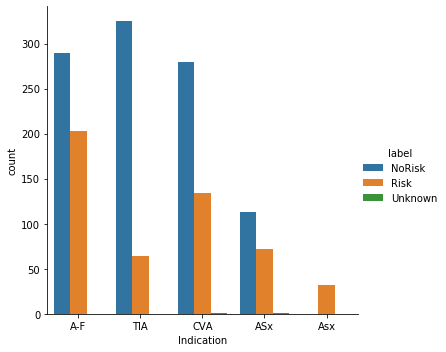

In [6]:
#5th column error in bar chart 
sns.catplot('Indication', data = rawData, kind = "count", hue='label')

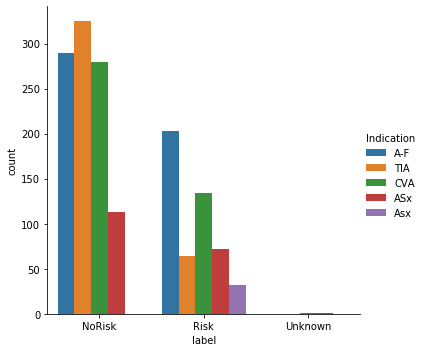

In [7]:
sns.catplot('label', data = rawData, kind = "count", hue= 'Indication')

### What does this boxplot show?

* Boxplot diagram showing whether a patient is at the 'Risk' or 'NoRisk' based on their cardiovascular event (Indication) against ipsilateral (IPSI)
* Shows that a high IPSI with any Indication means that the patient is at a high risk of developing cancer evidenced by the orange hue
* This means that IPSI is a huge contributor to the risk factor for patients as seen by comparing high IPSI percentages vs 'Risk', whereas for 'NoRisk' hue which is blue, IPSI levels are lower and therefore the chance of developing cancer is lower. However, for 'ASX' Indication, this is less distributed meaning 'ASX' may also be a contributor
* lowercase 'Asx' will later be merged with the current capitalised 'ASX'

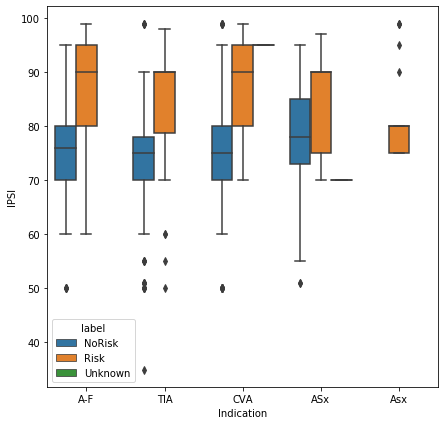

In [8]:
plt.figure(figsize= (7,7))
sns.boxplot(x='Indication', y= 'IPSI', data= rawData, hue= 'label')  

### What do these bar charts show? 
* When comparing 'Diabetes' to 'Risk' and 'NoRisk' in bar chart 1, it is evident that patients who have diabetes are more at risk of developing cancer indicated by the 'yes' column. However, those who don't have diabetes are at less risk, and the orange bar on the left indicates that they may have other ilnesses that contribute to cancer development.  
* For bar chart 2, it is seen that patients with s ischemic heart disease (IHD) are also at risk of developing cancer as the ratios for yes and no column vary significantly. 
* Comparing hypertension to 'Risk', 'NoRisk' in bar chart 3, it is seen that patients who don't have hypertension are much less at risk, compared to those who do. 
* This can also be seen with Arrhythmia in bar chart 4 which shows the biggest difference in 'yes' and 'no' ratio with those who have Arrhythmia. This indicates Arrhythmia being one of the most serious determinants of whether patients are at risk or not. 

### 1.c

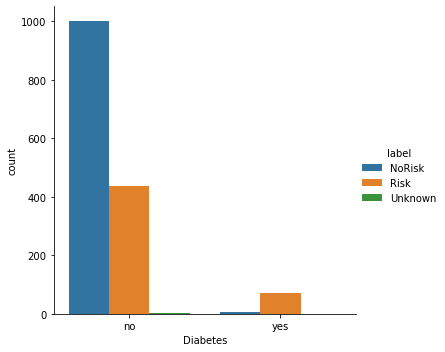

In [9]:
sns.catplot('Diabetes', data = rawData, kind = "count", hue='label') #Bar chart 1

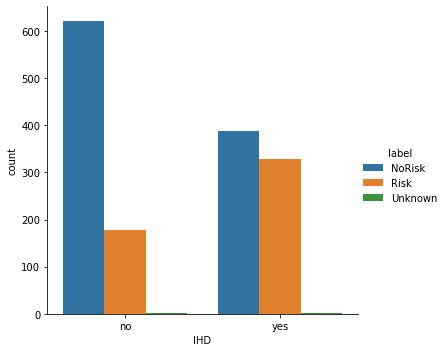

In [10]:
sns.catplot('IHD', data = rawData, kind = "count", hue='label') #Bar chart 2

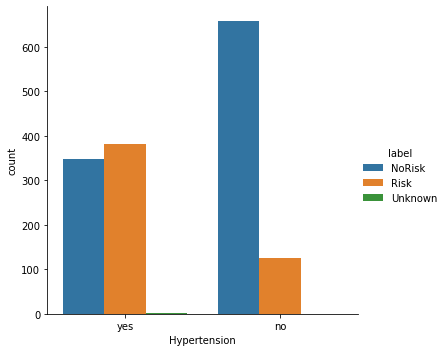

In [11]:
sns.catplot('Hypertension', data = rawData, kind = "count", hue='label') #Bar chart 3

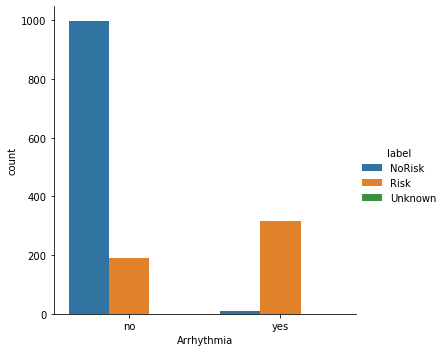

In [12]:
sns.catplot('Arrhythmia', data = rawData, kind = "count", hue='label') #Bar chart 4

### Searching for more evidence of duplicates 
* 'If' statement simply confirms the check for 'Random' column duplicates 
* This check is also carried out on 'Id' column so patients can identified as different people, and also to check if this column is useful according to data description or dropped later on. 

In [13]:
duplicates2= rawData.Random.duplicated()
if duplicates2.any():
        print("True") #True if there are duplicates 
else:
    print("False")


True


In [14]:
duplicates2= rawData.Id.duplicated()
if duplicates2.any():
        print("True") #True if there are duplicates in Id (In this case False)
else:   
    print("False")

False


# Crisp-DM (Data Preperation)

### 2.a

In [15]:
#Removing 'Random' column from dataset 
semiCleanDf= rawData.drop('Random', axis=1).copy()       
semiCleanDf.head()

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,245829,CVA,no,no,no,no,no,70.0,20,NoRisk


This part shows how null values are detected for all columns within the dataset. False for no null values, and true for null values. Individual column search is also conducted to double check that there are no null values that have been missed out. Diabetes example below shows how this is done to find column null values.

In [16]:
isnull= semiCleanDf.isnull()     
isnull.head()

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [17]:
bool_series = pd.isnull(semiCleanDf["Diabetes"])  #one example of showing NaN values for one column  
semiCleanDf[bool_series]

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
447,224257,CVA,NaN,yes,yes,yes,no,90.0,100,Risk
514,210861,A-F,NaN,no,yes,no,no,80.0,40,NoRisk


In [18]:
#How many null values overall for each column?      
semiCleanDf.isnull().sum()   

Id              0
Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          0
label           3
dtype: int64

In [19]:
semiCleanDf.shape     

(1520, 10)

In [20]:
#Drops 'any' NaN (null) values within dataset, however, there is more cleaning to do. 
semiCleanDf2= semiCleanDf.dropna(how='any').copy()
semiCleanDf2.shape 

(1503, 10)

In [21]:
semiCleanDf2

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...
1515,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [22]:
semiCleanDf2.describe(include=[np.number])

,Id,IPSI
count,1503.000000,1503.000000
mean,188107.952096,78.827013
std,64455.557291,10.163085
min,78261.000000,35.000000
25%,136029.500000,73.000000
50%,191092.000000,77.000000
75%,244493.000000,85.000000
max,295978.000000,99.000000


* When we try to describe the data and look at the 'unique' row we can see that Indication has 5 unique entries when the data description claims that there are only 4. This means that if there are duplicates for this column, they must be merged or dropped. 
* This can also be seen with the 'label' column which has 3 entries when there should only be two, 'Risk' and 'NoRisk'. This will be fixed later. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [23]:
# 5 unique values for 'Indication' column but we want 4 because ASx should equal Asx
semiCleanDf2.describe(include='O')

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Contra,label
count,1503,1503,1503,1503,1503,1503,1503,1503
unique,5,2,2,2,2,2,40,3
top,A-F,no,no,no,no,no,100,NoRisk
freq,489,1428,791,777,1179,1481,238,1001


To merge all'ASX' entries 'replace' method must be used. Going back to **Crisp-DM Data Understanding** we saw that there were two names for the same attribute which was 'ASx' and 'Asx' meaning the same thing. So in the below code both are merged together and capitalised to have the same dfinition and to prevent annomalies from appearing in the future. 

In [24]:
#This line of code WORKS despite the small error 
semiCleanDf2['Indication'].replace('Asx', 'ASx', inplace= True)
semiCleanDf2['Indication'].replace('ASx', 'ASX', inplace= True)

In [25]:
#Now you can see that there are 4 unique values for 'Indication' like stated in data description
semiCleanDf2.describe(include='O') 

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Contra,label
count,1503,1503,1503,1503,1503,1503,1503,1503
unique,4,2,2,2,2,2,40,3
top,A-F,no,no,no,no,no,100,NoRisk
freq,489,1428,791,777,1179,1481,238,1001


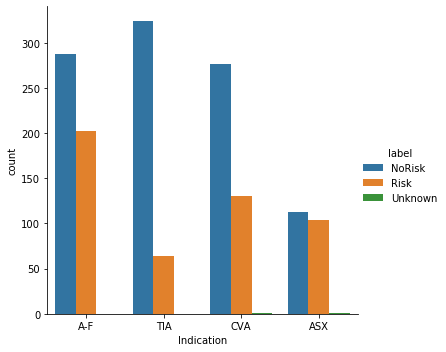

In [26]:
#Notice no 5th column in bar chart 
sns.catplot('Indication', data = semiCleanDf2, kind = "count", hue='label')

In [27]:
#Drops rows with 'Unknown' in label (Works)
#Found corrupted data entries apart from NaN values using excel, ctrl+f to search for empty spaces or 'Unknown' as shown in the above chart. 
semiCleanDf2.drop(475, axis=0, inplace= True)#label column 'Unknown' cell
semiCleanDf2.drop(523, axis=0, inplace= True)#Label column 'Unknown' cell nummber 2
semiCleanDf2.drop(453, axis=0, inplace=True) #contra empty cell 

cleanDataFrame= semiCleanDf2
cleanDataFrame.shape

(1500, 10)

No third data entry for 'label' column. Links back to **Crisp-DM Data Understanding** because we have dropped all 'Unknwon' rows from the dataset, therefore only giving defined entries with 'Risk' and 'NoRisk'.
* This can also be seen in "cleanDataFrame.describe(include='O')" function below to see that there are now 4 unique values in 'Indication' column and 2 unique values in 'label' column as stated by the data description. 

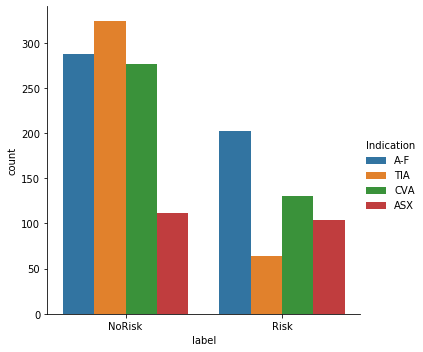

In [28]:
sns.catplot('label', data = cleanDataFrame, kind = "count", hue= 'Indication')

### 2.b

In [29]:
#'Unknown' has been removed from label which now only has'Risk' and 'NoRisk as seen by 'label' '2'
cleanDataFrame.describe(include='O')  

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,Contra,label
count,1500,1500,1500,1500,1500,1500,1500,1500
unique,4,2,2,2,2,2,39,2
top,A-F,no,no,no,no,no,100,NoRisk
freq,489,1425,789,777,1177,1478,237,1000


In [30]:
cleanDataFrame.shape

(1500, 10)

In [31]:
%matplotlib inline
#%matplotlib notebook

**Histogram showing percentage figure for cerebral ischemic lesions defined as ipsilateral (IPSI)**
* This shows that IPSI percentages from 70 to 90 as the most frequent seen by the upwards trend around those areas
* The X-axis shows a range from 30 to 100 and the Y-axis displays the frequency in which they occur for this patient dataset 
* It is evident that this data sample contains a very high number of ipsilateral patients with high percentages which may put them at risk of being diagnosed with cancer, especially when taking other factors into consideration like 'Contra' and 'Indication' 

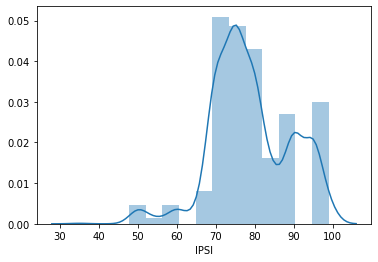

In [32]:
plt.figure(figsize= (6,4))    
sns.distplot( cleanDataFrame['IPSI'], bins = 15)

In [33]:
cleanDataFrame['Contra'] = cleanDataFrame.Contra.astype(int)

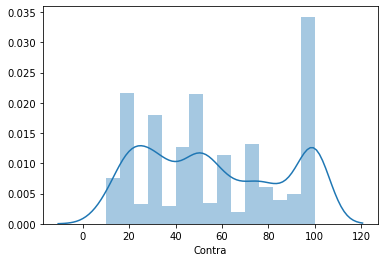

In [34]:
plt.figure(figsize= (6,4))
sns.distplot( cleanDataFrame['Contra'], bins = 15)

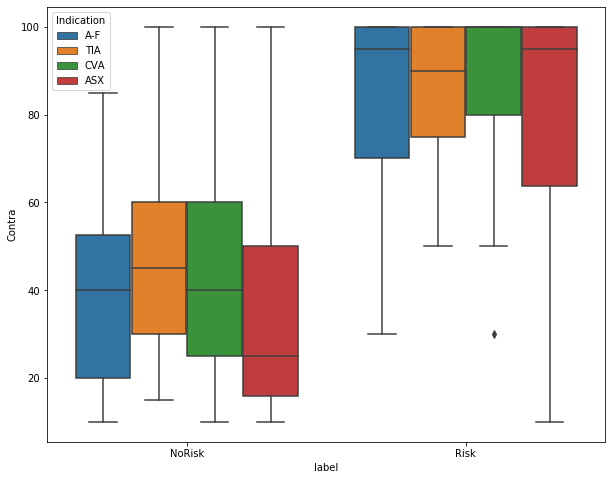

In [35]:
plt.figure(figsize= (10,8))
sns.boxplot(x='label', y= 'Contra', data= cleanDataFrame, hue= 'Indication')

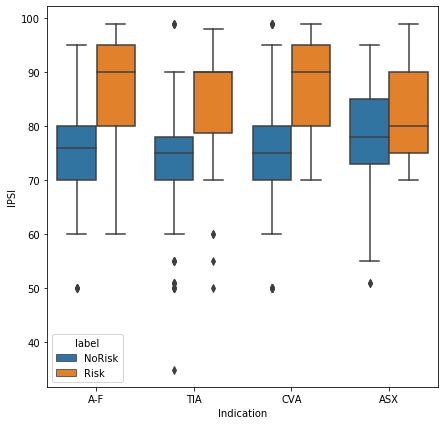

In [36]:
plt.figure(figsize= (7,7))
sns.boxplot(x='Indication', y= 'IPSI', data= cleanDataFrame, hue= 'label')  

### 2.c

* This section converts all object types to integers so that models can be created 
* Uses 'LabelEncoder' library imported from sklearn to create numerical versions of existing string version columns with suffix '_n' after each column name
* Underneath a new table has been created with string columns from before, as well as the new int columns for a side by side comparison 

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [37]:
from sklearn.preprocessing import LabelEncoder    

In [38]:
inputs= cleanDataFrame.drop('label', axis= 'columns')
target= cleanDataFrame 

num_label = LabelEncoder()
num_Indication = LabelEncoder()
num_Diabetes= LabelEncoder()
num_IHD = LabelEncoder()
num_Hypertension = LabelEncoder()
num_Indication = LabelEncoder()       
num_Arrhythmia= LabelEncoder()
num_History= LabelEncoder()


In [39]:
#_n at the end represents a number column for that column 
inputs['Indication_n'] = num_Indication.fit_transform(inputs['Indication'])
inputs['Diabetes_n'] = num_Diabetes.fit_transform(inputs['Diabetes'])    
inputs['IHD_n'] = num_IHD.fit_transform(inputs['IHD'])
inputs['Hypertension_n'] = num_Hypertension.fit_transform(inputs['Hypertension'])
inputs['Arrhythmia_n'] = num_Arrhythmia.fit_transform(inputs['Arrhythmia'])
inputs['History_n'] = num_History.fit_transform(inputs['History'])
target['label_n'] = num_label.fit_transform(target['label']) 

inputs.head()    

,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,Indication_n,Diabetes_n,IHD_n,Hypertension_n,Arrhythmia_n,History_n
0,218242,A-F,no,no,yes,no,no,78.0,20,0,0,0,1,0,0
1,159284,TIA,no,no,no,no,no,70.0,60,3,0,0,0,0,0
2,106066,A-F,no,yes,yes,no,no,95.0,40,0,0,1,1,0,0
3,229592,TIA,no,no,yes,no,no,90.0,85,3,0,0,1,0,0
4,245829,CVA,no,no,no,no,no,70.0,20,2,0,0,0,0,0


In [40]:
#Creating a new dataframe to separate x and y values for fitting a model later on. target will be y
target= target.drop(['Id','Indication', 'Diabetes', 'IHD','Hypertension', 'Arrhythmia', 'History','IPSI','Contra', 'label'], axis='columns')
target.head()

,label_n
0,0
1,0
2,1
3,1
4,0


# Crisp-DM (Modelling)
## Model 1

In [41]:
#Dropping string values for modelling purposes 
inputs_n= inputs.drop(['Diabetes', 'IHD','Hypertension', 'Arrhythmia', 'History','Id', 'Indication'], axis='columns')  
inputs_n.head() 
        

,IPSI,Contra,Indication_n,Diabetes_n,IHD_n,Hypertension_n,Arrhythmia_n,History_n
0,78.0,20,0,0,0,1,0,0
1,70.0,60,3,0,0,0,0,0
2,95.0,40,0,0,1,1,0,0
3,90.0,85,3,0,0,1,0,0
4,70.0,20,2,0,0,0,0,0


In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x= inputs_n    
y= target           
    
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, shuffle=False) #change size to 0.5 for lower result

In [44]:
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=30, min_samples_split=5, min_samples_leaf=2)       

model1.fit(X_train, y_train)
train_pred = model1.predict(X_train)        

In [45]:
np.asarray( X_train ).reshape(-1,1)    
np.asarray( y_train ).reshape(-1,1).ravel()  

array([0, 0, 1, ..., 0, 1, 1])

In [46]:
np.asarray( X_test ).reshape(-1,1)   
np.asarray( y_test ).reshape(-1,1).ravel()     

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [47]:
#70:30 split which is why we get 1050
len(X_train)

1050

In [48]:
len(y_train)     


1050

In [49]:
len(target)

1500

In [50]:
len(inputs_n)

1500

In [51]:
inputs_n.describe(include=[np.number])

,IPSI,Contra,Indication_n,Diabetes_n,IHD_n,Hypertension_n,Arrhythmia_n,History_n
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000
mean,78.828000,56.668000,1.462667,0.050000,0.47400,0.482000,0.215333,0.014667
std,10.159555,29.524977,1.191170,0.218018,0.49949,0.499843,0.411190,0.120255
min,35.000000,10.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,73.000000,30.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,77.000000,50.000000,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,85.000000,85.000000,3.000000,0.000000,1.00000,1.000000,0.000000,0.000000
max,99.000000,100.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [52]:
inputs_n.dtypes

IPSI              float64
Contra              int32
Indication_n        int32
Diabetes_n          int32
IHD_n               int32
Hypertension_n      int32
Arrhythmia_n        int32
History_n           int32
dtype: object

*Despite a lower number of data fed into the model, it still has a relatively high accuracy. This could be because the data is now split 50:50 which gives test and train sets equal distribution.

[Text(909.4852941176471, 1291.05, 'X[6] <= 0.5\ngini = 0.444\nsamples = 1050\nvalue = [700, 350]'),
 Text(629.1176470588235, 1155.15, 'X[1] <= 74.0\ngini = 0.26\nsamples = 819\nvalue = [693, 126]'),
 Text(403.45588235294116, 1019.25, 'X[0] <= 87.5\ngini = 0.106\nsamples = 641\nvalue = [605, 36]'),
 Text(232.5, 883.3499999999999, 'X[2] <= 0.5\ngini = 0.057\nsamples = 574\nvalue = [557, 17]'),
 Text(109.41176470588235, 747.4499999999999, 'X[5] <= 0.5\ngini = 0.144\nsamples = 179\nvalue = [165, 14]'),
 Text(54.705882352941174, 611.55, 'X[0] <= 79.5\ngini = 0.018\nsamples = 110\nvalue = [109, 1]'),
 Text(27.352941176470587, 475.65, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(82.05882352941177, 475.65, 'X[1] <= 40.0\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(54.705882352941174, 339.75, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(109.41176470588235, 339.75, 'X[1] <= 55.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(82.05882352941177, 203.8499999999999, 'gini 

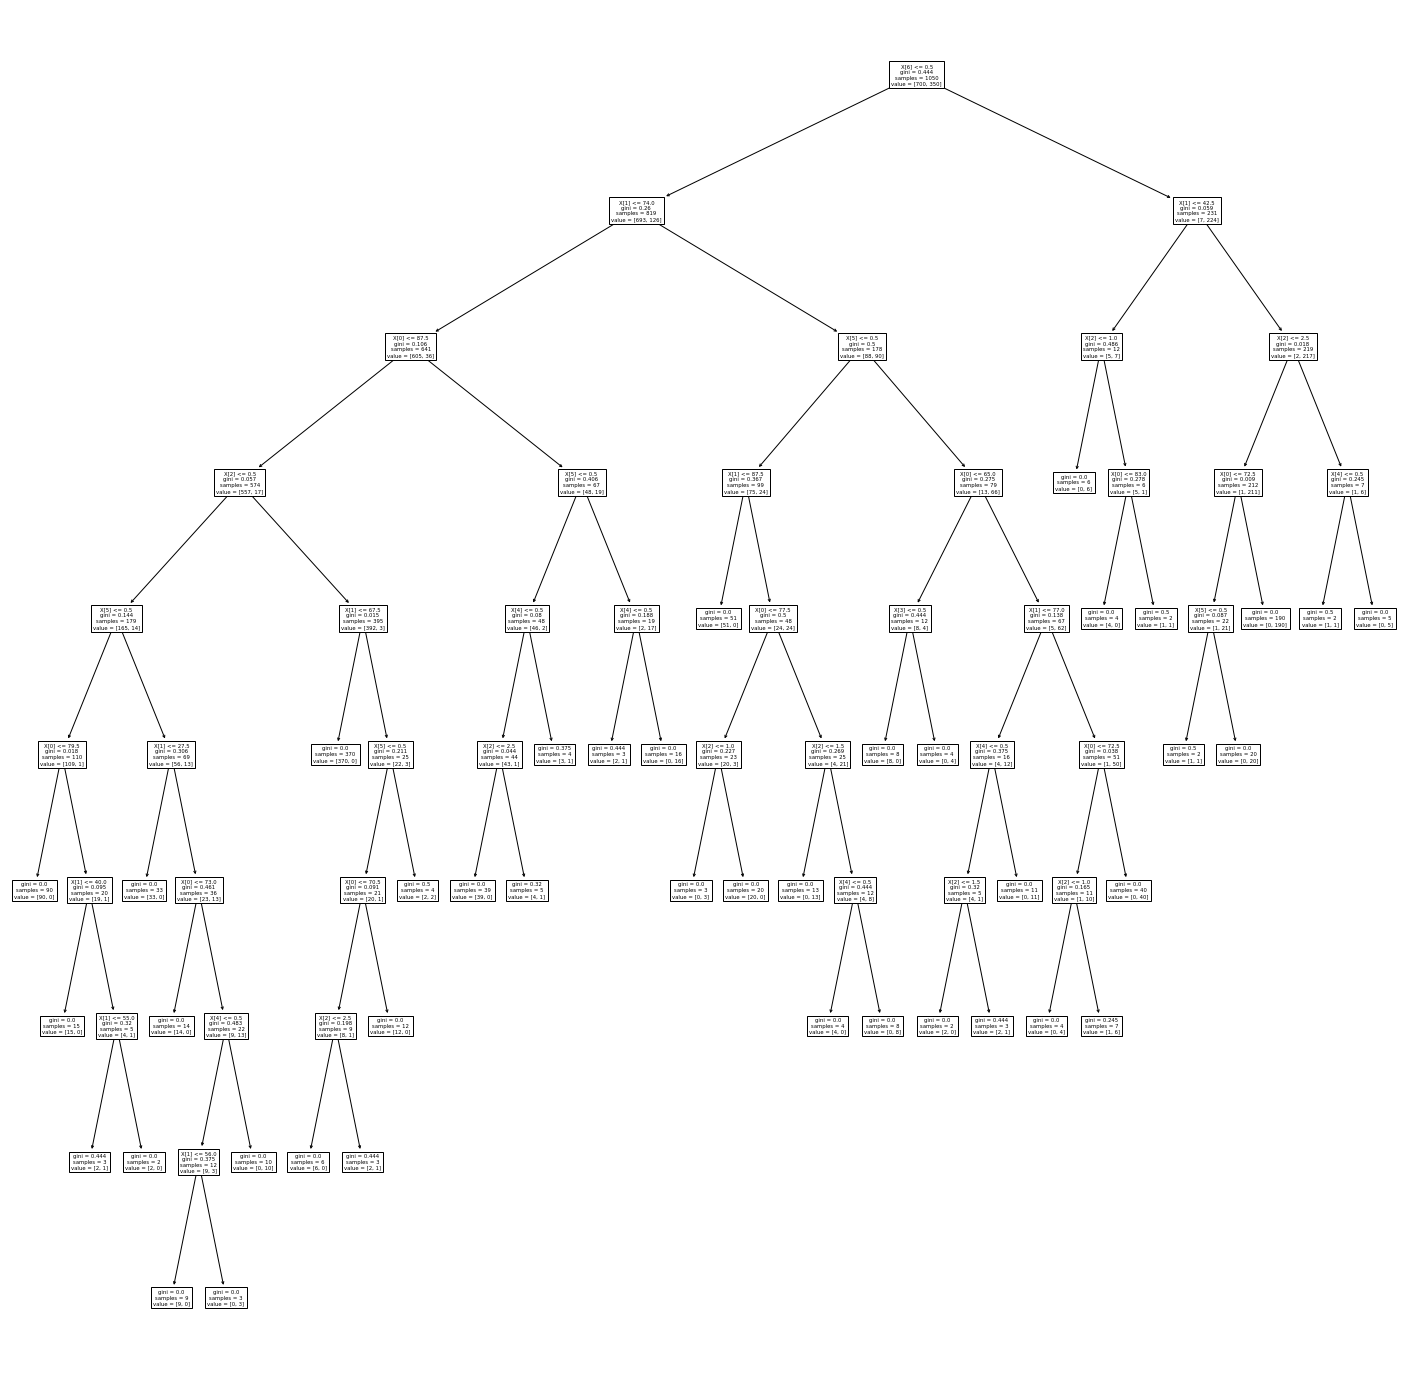

In [53]:
from sklearn.tree import plot_tree   
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,25)             
plot_tree(model1)    

## Model 2 

In [54]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(max_depth=10, min_samples_split=50, min_samples_leaf=2)
    
model2.fit(X_train, y_train)
train_pred = model2.predict(X_train)   

[Text(971.9791666666666, 1261.9285714285713, 'X[6] <= 0.5\ngini = 0.444\nsamples = 1050\nvalue = [700, 350]'),
 Text(703.9583333333333, 1067.7857142857142, 'X[1] <= 74.0\ngini = 0.26\nsamples = 819\nvalue = [693, 126]'),
 Text(477.91666666666663, 873.6428571428571, 'X[0] <= 87.5\ngini = 0.106\nsamples = 641\nvalue = [605, 36]'),
 Text(335.8333333333333, 679.5, 'X[2] <= 0.5\ngini = 0.057\nsamples = 574\nvalue = [557, 17]'),
 Text(206.66666666666666, 485.3571428571429, 'X[5] <= 0.5\ngini = 0.144\nsamples = 179\nvalue = [165, 14]'),
 Text(103.33333333333333, 291.2142857142858, 'X[0] <= 79.5\ngini = 0.018\nsamples = 110\nvalue = [109, 1]'),
 Text(51.666666666666664, 97.07142857142867, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(155.0, 97.07142857142867, 'gini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(310.0, 291.2142857142858, 'X[1] <= 27.5\ngini = 0.306\nsamples = 69\nvalue = [56, 13]'),
 Text(258.3333333333333, 97.07142857142867, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),

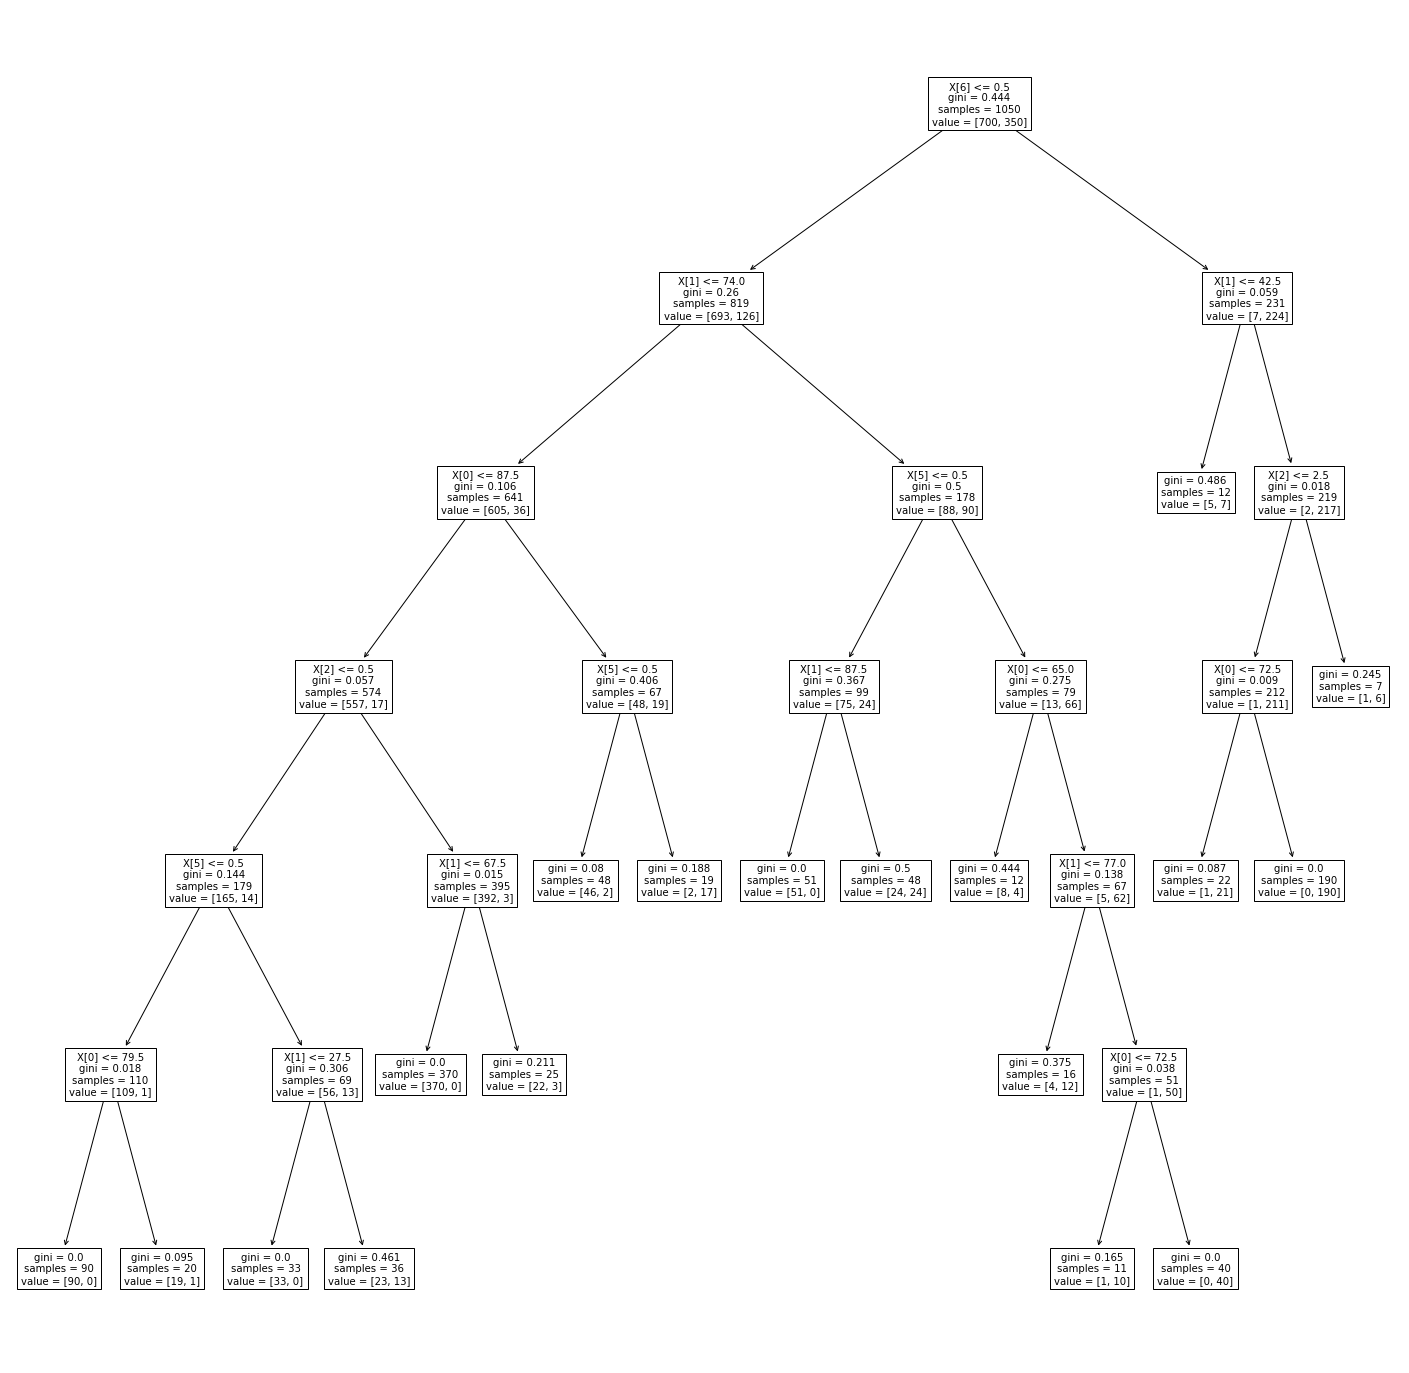

In [55]:
from sklearn.tree import plot_tree   
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,25)             
plot_tree(model2)  

## Model 3 

In [56]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=30, min_samples_split=2)
        
model3.fit(X_train, y_train)
train_pred = model3.predict(X_train)     

[Text(711.45, 1032.8400000000001, 'X[6] <= 0.5\ngini = 0.444\nsamples = 1050\nvalue = [700, 350]'),
 Text(474.3, 924.1200000000001, 'X[1] <= 74.0\ngini = 0.26\nsamples = 819\nvalue = [693, 126]'),
 Text(295.74, 815.4000000000001, 'X[0] <= 87.5\ngini = 0.106\nsamples = 641\nvalue = [605, 36]'),
 Text(167.4, 706.6800000000001, 'X[2] <= 0.5\ngini = 0.057\nsamples = 574\nvalue = [557, 17]'),
 Text(89.28, 597.96, 'X[5] <= 0.5\ngini = 0.144\nsamples = 179\nvalue = [165, 14]'),
 Text(44.64, 489.24, 'X[7] <= 0.5\ngini = 0.018\nsamples = 110\nvalue = [109, 1]'),
 Text(22.32, 380.5200000000001, 'gini = 0.0\nsamples = 109\nvalue = [109, 0]'),
 Text(66.96000000000001, 380.5200000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 489.24, 'X[1] <= 27.5\ngini = 0.306\nsamples = 69\nvalue = [56, 13]'),
 Text(111.6, 380.5200000000001, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(156.24, 380.5200000000001, 'X[0] <= 73.0\ngini = 0.461\nsamples = 36\nvalue = [23, 13]'),
 

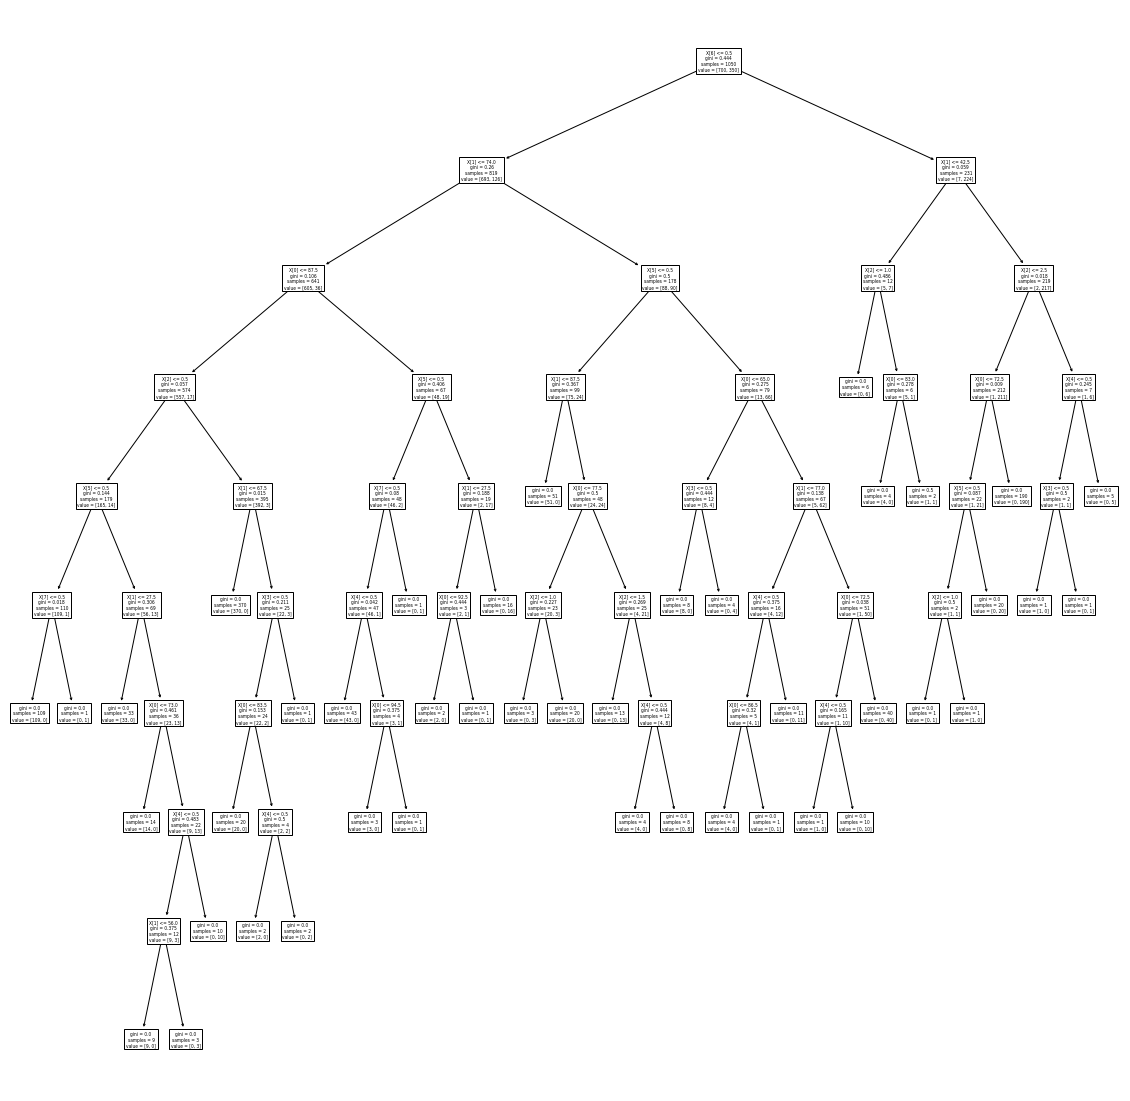

In [57]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)             
plot_tree(model3) 

## Model 4

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
model4= MLPClassifier(solver='sgd', max_iter= 20000, hidden_layer_sizes=(15), random_state=2)

In [60]:
np.asarray( X_train ).reshape(-1,1)         
np.asarray( y_train ).reshape(-1,1).ravel()

array([0, 0, 1, ..., 0, 1, 1])

In [61]:
np.asarray( X_test ).reshape(-1,1)         
np.asarray( y_test ).reshape(-1,1).ravel() 

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [62]:
len(X_train)           

1050

In [63]:
len(y_train)

1050

In [64]:
model4.fit(X_train, np.ravel(y_train))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=15, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=20000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=2, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Model 5 

In [65]:
model5= MLPClassifier(solver='sgd', max_iter= 50000, hidden_layer_sizes=(20), random_state=3)

In [66]:
np.asarray( X_train ).reshape(-1,1)        
np.asarray( y_train ).reshape(-1,1).ravel()

array([0, 0, 1, ..., 0, 1, 1])

In [67]:
np.asarray( X_test ).reshape(-1,1)        
np.asarray( y_test ).reshape(-1,1).ravel() 

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [68]:
model5.fit(X_train, np.ravel(y_train))

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=20, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=3, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

## Model 6

In [69]:
model6= MLPClassifier(solver='sgd', max_iter= 50000, hidden_layer_sizes=(15), random_state=1)

In [70]:
np.asarray( X_train ).reshape(-1,1)                         
np.asarray( y_train ).reshape(-1,1).ravel()

array([0, 0, 1, ..., 0, 1, 1])

In [71]:
np.asarray( X_test ).reshape(-1,1)         
np.asarray( y_test ).reshape(-1,1).ravel()  

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [72]:
model6.fit(X_train, np.ravel(y_train)) 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=15, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=50000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Crisp-DM (Evaluation)

## Accuracy/ K-Cross Validation/ MSE & MAE/ Predictions/ Confusion Matrix
* From top to bottom for each model

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error   
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score

In [74]:
y_pred1= model1.predict(X_train)      
y_pred1.ravel()

array([0, 0, 1, ..., 0, 1, 1])

## Model 1 Evaluation

In [75]:
y_pred1= model1.predict(X_test)           
print("Accuracy: ", accuracy_score(y_test, y_pred1))    

Accuracy:  0.9688888888888889


In [76]:
cross_val_score(model1, x, y, cv= 5)    

array([0.97333333, 0.97666667, 0.98666667, 0.97666667, 0.97666667])

In [77]:
MAE= mean_absolute_error(y_train, model1.predict(X_train) )     
MSE= mean_squared_error(y_train, model1.predict(X_train) )
print("Mean Absolute Error: " + str(MAE))     
print("Mean Squared Error: " + str(MSE))   

Mean Absolute Error: 0.011428571428571429
Mean Squared Error: 0.011428571428571429


In [78]:
y_pred1= model1.predict(X_test)      
y_pred1.ravel()

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

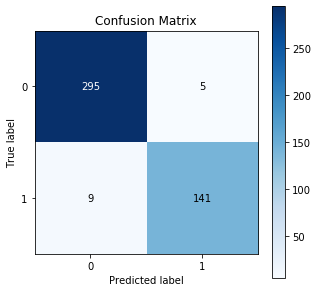

In [79]:
plt.rcParams["figure.figsize"] = (5,5)             
matrix1 = skplt.metrics.plot_confusion_matrix( 
     y_test, y_pred1     
)      
plt.show()

In [80]:
y_pred1= model1.predict(X_train)      
y_pred1.ravel()

array([0, 0, 1, ..., 0, 1, 1])

## Model 2 Evaluation

In [81]:
y_pred2= model2.predict(X_test)                    

print("Accuracy: ", accuracy_score(y_test, y_pred2))

Accuracy:  0.9266666666666666


In [82]:
cross_val_score(model2, x, y, cv= 5)           

array([0.91333333, 0.95333333, 0.96666667, 0.94333333, 0.96666667])

In [83]:
MAE= mean_absolute_error(y_train, model2.predict(X_train) )     
MSE= mean_squared_error(y_train, model2.predict(X_train) )
print("Mean Absolute Error: " + str(MAE))     
print("Mean Squared Error: " + str(MSE)) 

Mean Absolute Error: 0.058095238095238096
Mean Squared Error: 0.058095238095238096


In [84]:
y_pred2= model2.predict(X_test)      
y_pred2.ravel()

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

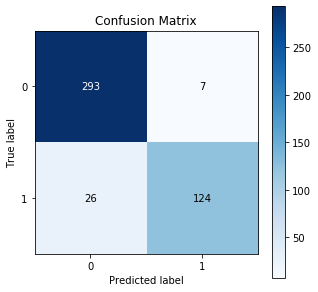

In [85]:
plt.rcParams["figure.figsize"] = (5,5)             
matrix2 = skplt.metrics.plot_confusion_matrix( 
     y_test, y_pred2     
)     
plt.show()

In [86]:
y_pred2= model2.predict(X_train)      
y_pred2.ravel()   

array([0, 0, 1, ..., 0, 1, 1])

# Model 3 Evaluation

In [87]:
y_pred3= model3.predict(X_test)                    

print("Accuracy: ", accuracy_score(y_test, y_pred3))       

Accuracy:  0.9822222222222222


In [88]:
cross_val_score(model3, x, y, cv= 5)    

array([0.98666667, 0.99      , 0.99333333, 0.98      , 0.99333333])

In [89]:
MAE= mean_absolute_error(y_train, model3.predict(X_train) )     
MSE= mean_squared_error(y_train, model3.predict(X_train) )
print("Mean Absolute Error: " + str(MAE))     
print("Mean Squared Error: " + str(MSE))       

Mean Absolute Error: 0.0009523809523809524
Mean Squared Error: 0.0009523809523809524


In [90]:
y_pred3= model3.predict(X_test)           
y_pred3.ravel()

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

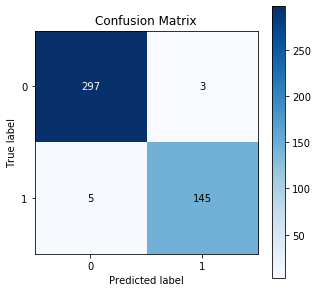

In [91]:
plt.rcParams["figure.figsize"] = (5,5)             
matrix3 = skplt.metrics.plot_confusion_matrix( 
     y_test, y_pred3     
)     
plt.show()

In [92]:
y_pred3= model3.predict(X_train)           
y_pred3.ravel()

array([0, 0, 1, ..., 0, 1, 1])

# Model 4 Evaluation

In [93]:
y_pred4= model4.predict(X_test)           
    
print("Accuracy: ", accuracy_score(y_test, y_pred4))   

Accuracy:  0.7644444444444445


In [94]:
cross_val_score(model4, x, np.ravel(y), cv= 5)    

array([0.80666667, 0.86666667, 0.83      , 0.79333333, 0.81      ])

In [95]:
MAE= mean_absolute_error(y_train, model4.predict(X_train) )
MSE= mean_squared_error(y_train, model4.predict(X_train) )
print("Mean Absolute Error: " + str(MAE))     
print("Mean Squared Error: " + str(MSE))         

Mean Absolute Error: 0.20761904761904762
Mean Squared Error: 0.20761904761904762


In [96]:
pred_y4= model4.predict(X_train)           
pred_y4.ravel()   

array([0, 0, 0, ..., 0, 1, 0])

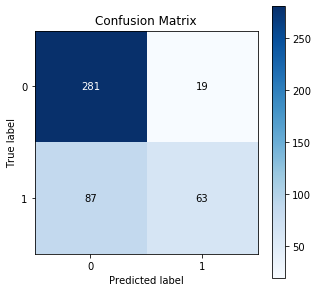

In [97]:
plt.rcParams["figure.figsize"] = (5,5)             
matrix4 = skplt.metrics.plot_confusion_matrix( 
     y_test, y_pred4     
)     
plt.show()

In [98]:
y_pred4= model4.predict(X_train)           
y_pred4.ravel()

array([0, 0, 0, ..., 0, 1, 0])

# Model 5 Evaluation

In [99]:
y_pred5= model5.predict(X_test)           
    
print("Accuracy: ", accuracy_score(y_test, y_pred5))   

Accuracy:  0.88


In [100]:
cross_val_score(model5, x, np.ravel(y), cv= 5)      

array([0.84333333, 0.85333333, 0.83666667, 0.85666667, 0.83333333])

In [101]:
MAE= mean_absolute_error(y_train, model5.predict(X_train) )
MSE= mean_squared_error(y_train, model5.predict(X_train) )
print("Mean Absolute Error: " + str(MAE))     
print("Mean Squared Error: " + str(MSE))    

Mean Absolute Error: 0.1419047619047619
Mean Squared Error: 0.1419047619047619


In [102]:
pred_y5= model5.predict(X_test)           
pred_y5.ravel()   

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,

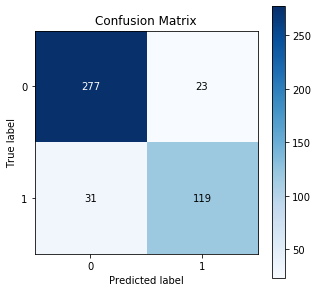

In [103]:
plt.rcParams["figure.figsize"] = (5,5)             
matrix5 = skplt.metrics.plot_confusion_matrix( 
     y_test, y_pred5     
)     
plt.show()

In [104]:
y_pred5= model5.predict(X_train)           
y_pred5.ravel()

array([0, 0, 0, ..., 1, 1, 0])

## Model 6 Evaluation

In [105]:
y_pred6= model6.predict(X_test)           
    
print("Accuracy: ", accuracy_score(y_test, y_pred6))   

Accuracy:  0.8777777777777778


In [106]:
cross_val_score(model6, x, np.ravel(y), cv= 5)    

array([0.86      , 0.86666667, 0.87      , 0.81333333, 0.84666667])

In [107]:
MAE= mean_absolute_error(y_train, model6.predict(X_train) )
MSE= mean_squared_error(y_train, model6.predict(X_train) )
print("Mean Absolute Error: " + str(MAE))     
print("Mean Squared Error: " + str(MSE))    

Mean Absolute Error: 0.13047619047619047
Mean Squared Error: 0.13047619047619047


In [108]:
pred_y6= model6.predict(X_test)           
pred_y6.ravel()  

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,

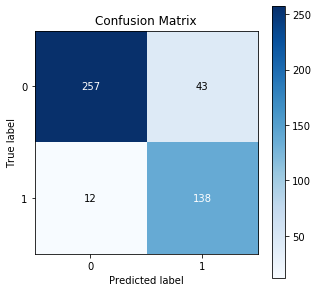

In [109]:
plt.rcParams["figure.figsize"] = (5,5)             
matrix6 = skplt.metrics.plot_confusion_matrix( 
     y_test, y_pred6     
)     
plt.show()

In [110]:
y_pred6= model6.predict(X_train)           
y_pred3.ravel()

array([0, 0, 1, ..., 0, 1, 1])